In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
#importing all of the packets from the dataset
path = '/Users/ecusa/Downloads/CSV_CICDDoS2019pt2/03-11/'
df_LDAP = pd.read_csv(path + 'LDAP.csv').sample(frac = 0.05)
df = df_LDAP
df = df.append(pd.read_csv(path + 'MSSQL.csv').sample(frac = 0.05))
df = df.append(pd.read_csv(path + 'NetBIOS.csv').sample(frac = 0.05))
df = df.append(pd.read_csv(path + 'Portmap.csv').sample(frac = 0.05))
df = df.append(pd.read_csv(path + 'Syn.csv').sample(frac = 0.05))
df = df.append(pd.read_csv(path + 'UDP.csv').sample(frac = 0.05))
df = df.append(pd.read_csv(path + 'UDPLag.csv').sample(frac = 0.05))

C:\Users\ecusa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#before, I already ran the code above and made it into a csv
#called "All.csv", so I just wanted to keep the dataframe consistent
df = pd.read_csv('/Users/ecusa/All.csv')

C:\Users\ecusa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df['DataType'] = 0
df['DataType'].loc[df[' Label'] == 'BENIGN'] = 1

C:\Users\ecusa\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC()

In [7]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 

In [11]:
#taking out all non-number features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

label_encoder = LabelEncoder()


df = df.select_dtypes(include=numerics)

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', ' Source Port', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Lengt

In [13]:
df_X = df.loc[:,:' Inbound']
df_X = df_X.columns
df_X

Index(['Unnamed: 0', 'Unnamed: 0.1', ' Source Port', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Lengt

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

X = df[df_X]
y = df['DataType']

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=1)

In [16]:
df['DataType'].loc[df['DataType'] == 0] = 'ATTACK'
df['DataType'].loc[df['DataType'] == 1] = 'BENIGN'

C:\Users\ecusa\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


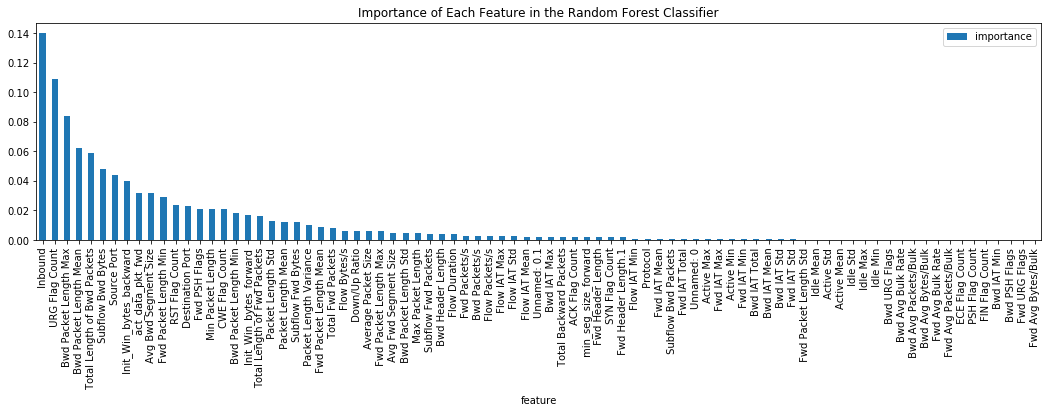

In [17]:
import numpy as np
rfc = RFC();

# fit random forest classifier on the training set
rfc.fit(train_X, train_y);

# extract important features
score_rfc = np.round(rfc.feature_importances_, 3)
importances_rfc = pd.DataFrame({'feature':train_X.columns,'importance':score_rfc})
importances_rfc = importances_rfc.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (18, 4)
#importances_rfc.plot.bar();
importances_rfc.plot.bar(title = 'Importance of Each Feature in the Random Forest Classifier')

In [18]:
from sklearn.ensemble import AdaBoostClassifier as ABC
abc = ABC()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC()
from sklearn.neural_network import MLPClassifier as MLPC
mlpc = MLPC()

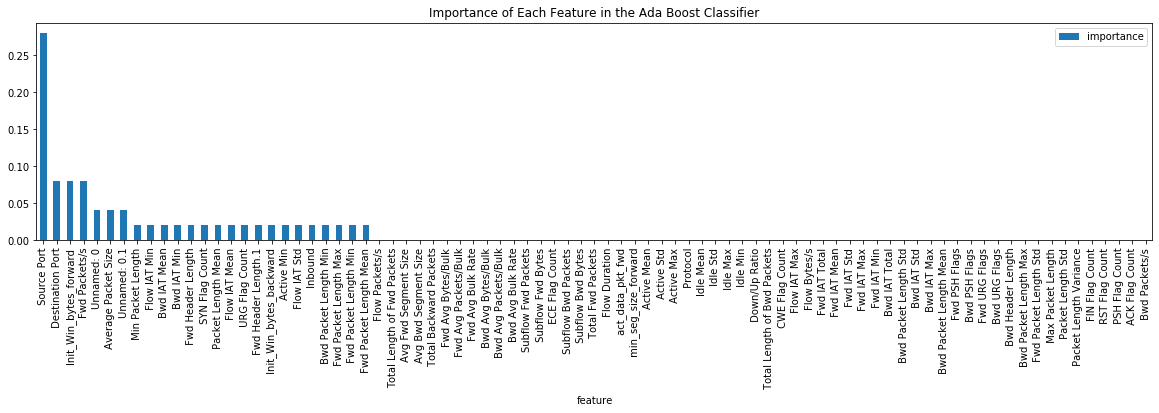

In [19]:
# fit random forest classifier on the training set
abc.fit(train_X, train_y);

# extract important features
score_abc = np.round(abc.feature_importances_, 3)
importances_abc = pd.DataFrame({'feature':train_X.columns,'importance':score_abc})
importances_abc = importances_abc.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (20, 4)
#importances_abc.plot.bar();
importances_abc.plot.bar(title = 'Importance of Each Feature in the Ada Boost Classifier')

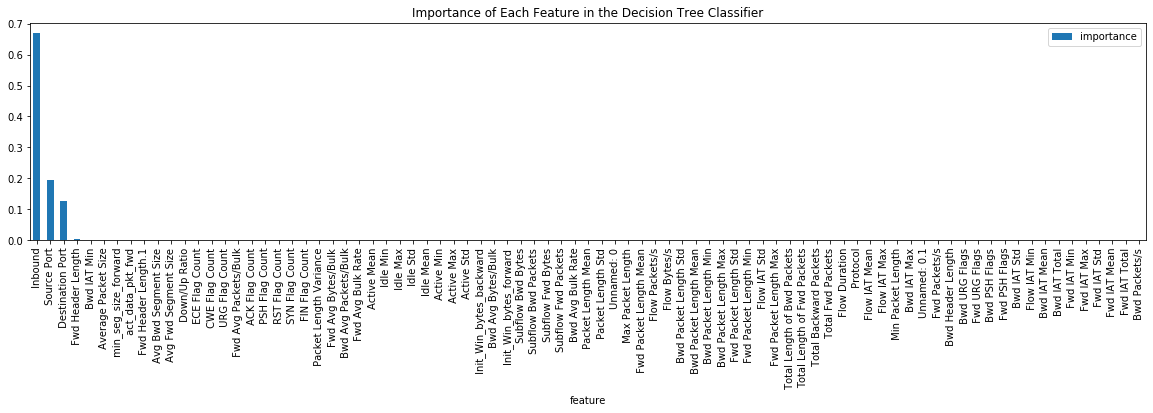

In [20]:
# fit random forest classifier on the training set
dtc.fit(train_X, train_y);

# extract important features
score_dtc = np.round(dtc.feature_importances_, 3)
importances_dtc = pd.DataFrame({'feature':train_X.columns,'importance':score_dtc})
importances_dtc = importances_dtc.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (20, 4)
#importances_dtc.plot.bar();
importances_dtc.plot.bar(title = 'Importance of Each Feature in the Decision Tree Classifier')

Text(0.5, 1.0, 'Box Plot of Destination Ports')

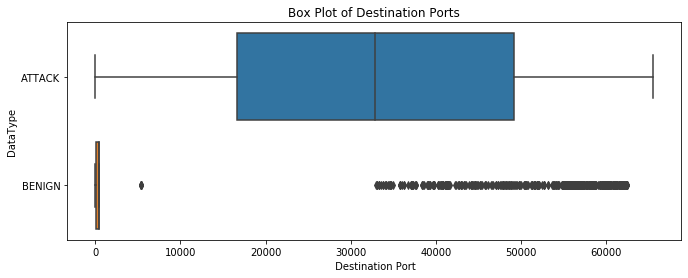

In [21]:
# start of EDA plotting
import seaborn as sns
fig = plt.figure(figsize=(11, 4))
fig.set_facecolor('w')
sns.boxplot(y='DataType', x=" Destination Port", data=df)
plt.title('Box Plot of Destination Ports')

Text(0.5, 1.0, 'Violin Plot of Flow Duration')

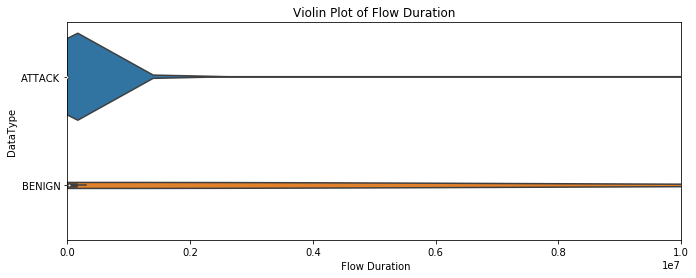

In [22]:
fig = plt.figure(figsize=(11, 4))
fig.set_facecolor('w')
sns.violinplot(y='DataType', x=" Flow Duration", data=df)
plt.xlim(0, 1e7)
plt.title('Violin Plot of Flow Duration')

Text(0.5, 1.0, 'Box Plot of Total Length of Fwd Packets')

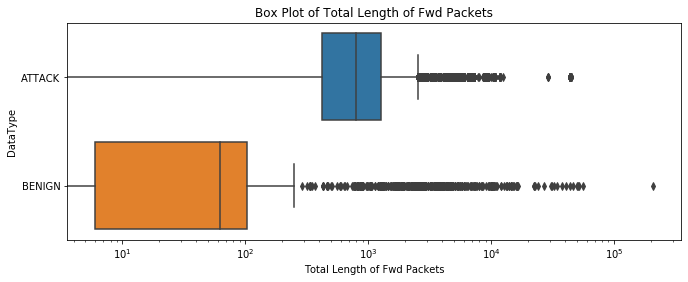

In [23]:
fig = plt.figure(figsize=(11, 4))
fig.set_facecolor('w')
sns.boxplot(y='DataType', x="Total Length of Fwd Packets", data=df)
plt.xscale('log')
plt.title('Box Plot of Total Length of Fwd Packets')

Text(0.5, 1.0, 'Violin Plot of Total Length of Bwd Packets')

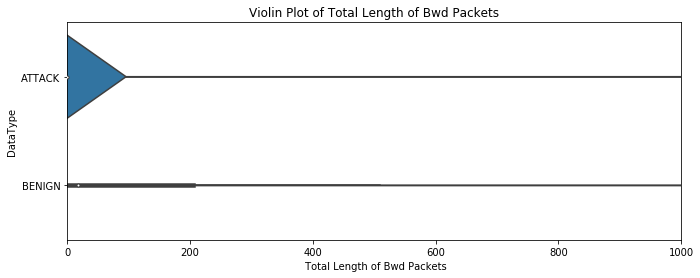

In [24]:
fig = plt.figure(figsize=(11, 4))
fig.set_facecolor('w')
sns.violinplot(y='DataType', x=" Total Length of Bwd Packets", data=df)
plt.xlim(0, 1000)
#plt.xscale('log')
plt.title('Violin Plot of Total Length of Bwd Packets')

Text(0.5, 1.0, 'Violin Plot of Fwd Packet Length Mean')

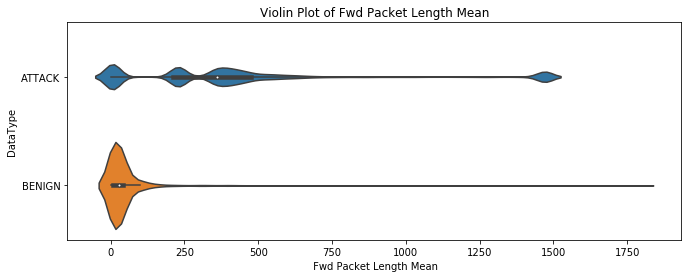

In [25]:
fig = plt.figure(figsize=(11, 4))
fig.set_facecolor('w')
sns.violinplot(y='DataType', x=" Fwd Packet Length Mean", data=df)
# plt.xlim(0, 1e5)
plt.title('Violin Plot of Fwd Packet Length Mean')

Text(0.5, 1.0, 'Box Plot of Bwd Packet Length Mean')

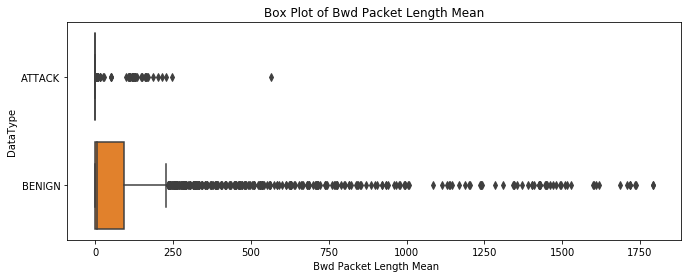

In [26]:
fig = plt.figure(figsize=(11, 4))
fig.set_facecolor('w')
sns.boxplot(y='DataType', x=" Bwd Packet Length Mean", data=df)
# plt.xlim(0, 200)
#plt.xscale('log')
plt.title('Box Plot of Bwd Packet Length Mean')

In [28]:
rfc_features = [' Inbound', ' URG Flag Count', 'Bwd Packet Length Max', ' Bwd Packet Length Mean', ' Avg Bwd Segment Size', 
               ' Subflow Bwd Bytes', ' Source Port', ' Fwd Packet Length Min', ' Total Length of Bwd Packets', 
                'Init_Win_bytes_forward', ' Bwd Packet Length Min', ' Init_Win_bytes_backward', ' Subflow Fwd Bytes',
               ' CWE Flag Count', ' Min Packet Length']

In [29]:
abc_features = [' Source Port', ' Destination Port', 'Init_Win_bytes_forward', 'Fwd Packets/s', 'Unnamed: 0', 
                ' Average Packet Size', ' Fwd Header Length', 'Unnamed: 0.1', ' Min Packet Length', ' Flow IAT Min',
                 ' Bwd IAT Mean', ' Bwd IAT Min', ' SYN Flag Count', ' Packet Length Mean', ' Flow IAT Mean']

In [30]:
dtc_features = [' Inbound', ' Source Port', ' Destination Port', ' ACK Flag Count', ' act_data_pkt_fwd',
               ' Max Packet Length', ' Subflow Bwd Packets', ' min_seg_size_forward', ' RST Flag Count',
                ' SYN Flag Count', ' URG Flag Count',' CWE Flag Count', ' URG Flag Count', ' Idle Max',
               ' RST Flag Count']

In [32]:
import seaborn as sn

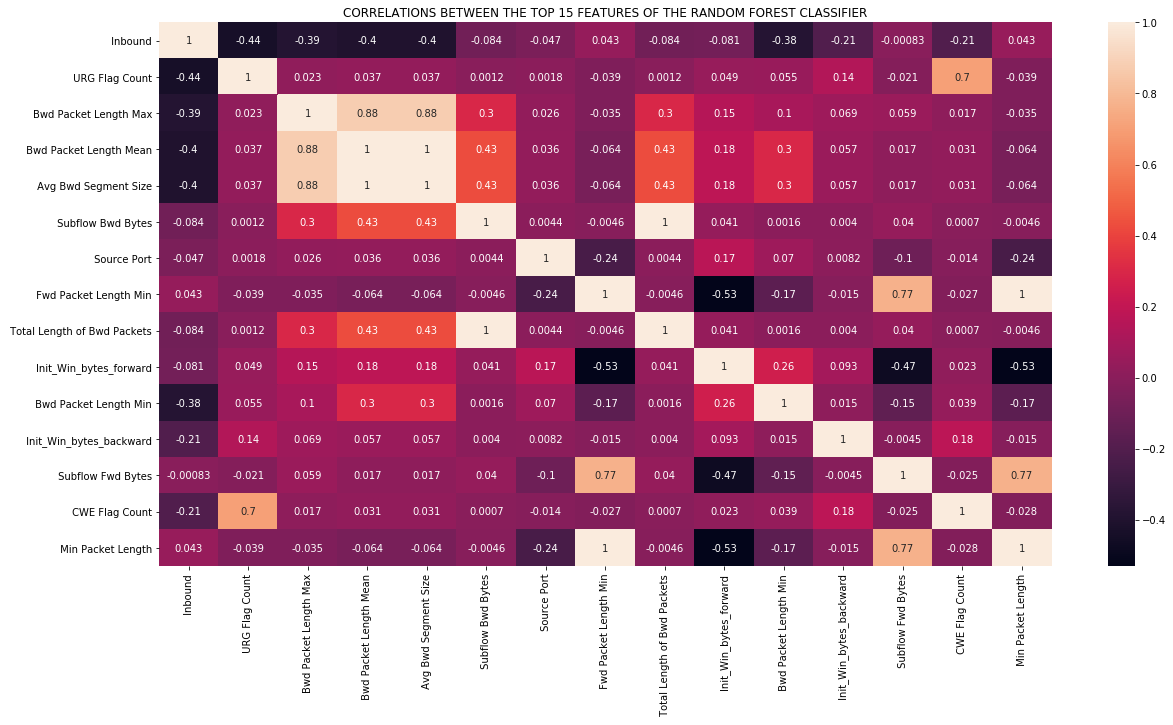

In [36]:
corr_matrix = df[rfc_features].corr()
sn.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('CORRELATIONS BETWEEN THE TOP 15 FEATURES OF THE RANDOM FOREST CLASSIFIER')
plt.show()

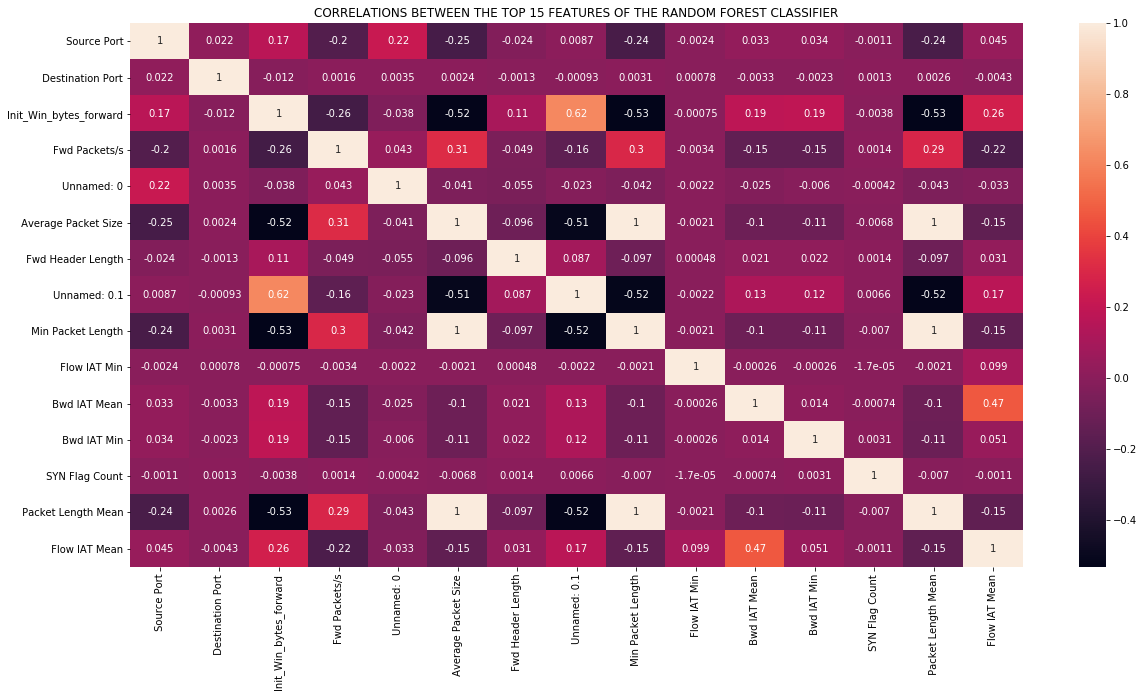

In [37]:
corr_matrix = df[abc_features].corr()
sn.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('CORRELATIONS BETWEEN THE TOP 15 FEATURES OF THE RANDOM FOREST CLASSIFIER')
plt.show()

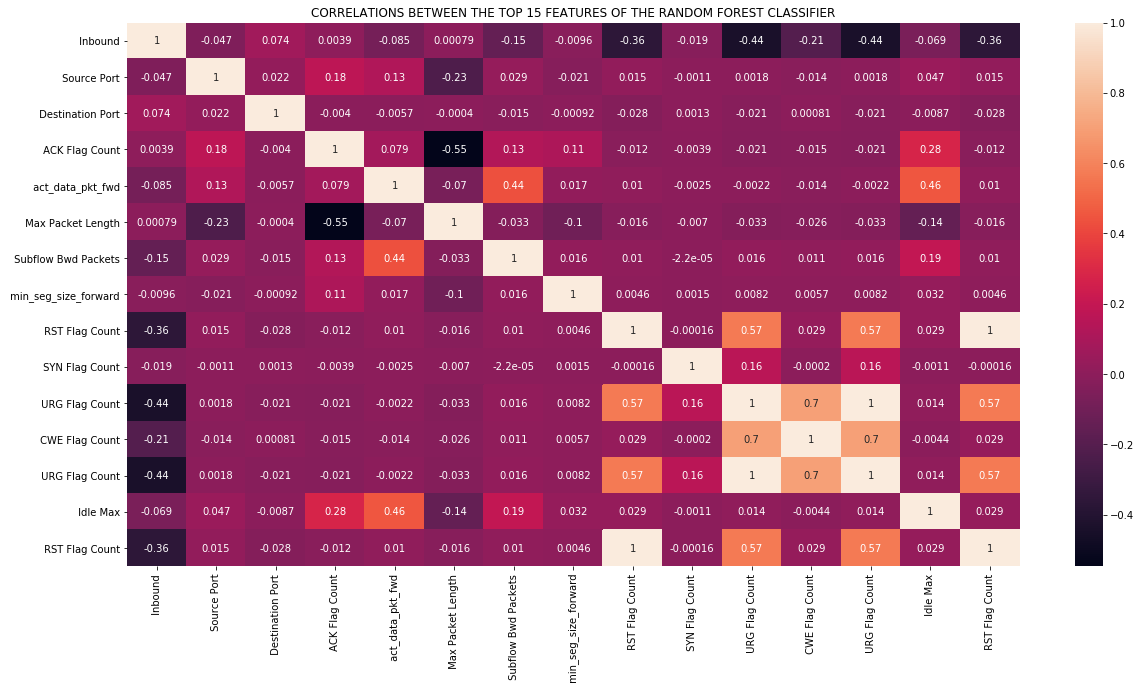

In [38]:
corr_matrix = df[dtc_features].corr()
sn.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('CORRELATIONS BETWEEN THE TOP 15 FEATURES OF THE RANDOM FOREST CLASSIFIER')
plt.show()